In [1]:
import random
import projetannuel

In [2]:
from lib_gridfs import load_posters_with_size, stock_metrics

In [3]:
imgs, genres = load_posters_with_size((10, 10), genres=['Horreur', 'Animation', 'Histoire'])

📦 Found 2991 images of size 10x10


📥 Loading resized images: 100%|██████████| 2991/2991 [00:05<00:00, 518.87it/s]


In [4]:
imgs_as_lists = [img.tolist() for img in imgs]

In [5]:
data = list(zip(imgs_as_lists, genres))
# filtered_data = [(img, genre) for img, genre in data if genre in ['Animation', 'Horreur']]

In [6]:
random.shuffle(data)
imgs_shuffled = [movie[0] for movie in data]
genres_shuffled = [movie[1] for movie in data]

In [7]:
# genres_shuffled_binarygenres_shuffled_binary = []
# for g in genres_shuffled:
#     .append(0 if g == "Horreur" else 1)

In [8]:
lim = int(len(data) * 0.8)
imgs_as_lists_train = imgs_shuffled[:lim]
genres_train = genres_shuffled[:lim]
imgs_as_lists_test = imgs_shuffled[lim:]
genres_test = genres_shuffled[lim:]

# RBF

In [9]:
# param_grid = {
#     'C': [10, 100, 1000],
#     'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
#     "learning_rate": [0.001, 0.01, 0.05, 0.1],
#     "epochs": [10000, 50000, 100000],
# }

In [10]:
# import itertools

# best_score = 0.0
# best_params = None
# y = projetannuel.string_labels(genres_shuffled)

# for c, gamma in itertools.product(
#     param_grid["C"],
#     param_grid["gamma"],
# ):
#     model = projetannuel.RBF(
#         imgs_shuffled,
#         y,
#         gamma = gamma,
#         k = c,
#         seed = 42
#     )
#     model.train_classification(epochs=1_000, learning_rate=0.01, algo="gradient-descent", x_test=imgs_shuffled, y_test=projetannuel.string_labels(genres_shuffled))
#     Y_pred = [model.predict(x) for x in imgs_shuffled]
#     acc = projetannuel.accuracy_score(genres_shuffled, Y_pred)
    
#     prop = Y_pred.count("Horreur") / len(Y_pred)
    
#     print(f"Proportion de 'Horreur' : {prop}")
#     print(f"Tested: Gamma={gamma}, C={c}, acc={acc:.4f}")
    
#     if acc > best_score:
#         best_score = acc
#         best_params = (gamma, c)

In [11]:
y = projetannuel.string_labels(genres_train)

model = projetannuel.RBF(
    imgs_as_lists_train,
    y,
    gamma = 0.1,
    k = 180
)

model.train_classification(epochs=1000, learning_rate=0.01, x_test=imgs_as_lists_test, y_test=projetannuel.string_labels(genres_test), algo="gradient-descent")

In [12]:
Y_pred = [model.predict(x) for x in imgs_as_lists_test]
print(f"Accuracy Score : {projetannuel.accuracy_score(genres_test, Y_pred)}")

Accuracy Score : 0.335559265442404


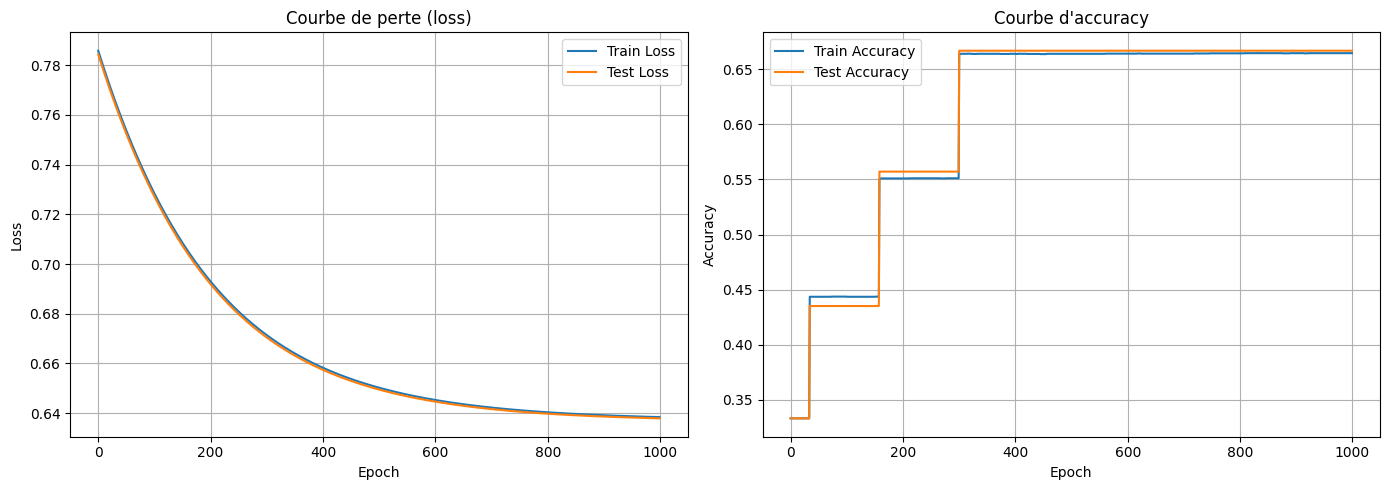

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Courbe de perte (Loss)
axs[0].plot(model.train_loss, label='Train Loss')
axs[0].plot(model.test_loss, label='Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Courbe de perte (loss)')
axs[0].grid(True)
axs[0].legend()

# Courbe d'accuracy
axs[1].plot(model.train_accuracy, label='Train Accuracy')
axs[1].plot(model.test_accuracy, label='Test Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Courbe d\'accuracy')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()